# Анализ макроэкономических показателей стран мира

# Оглавление
1. [Описание проекта](#cell1)
2. [Выгрузка и предобработка данных](#cell2)
3. [Исследовательский анализ данных](#cell3)
   
   3.1 [Группировка стран по географиескому признаку](#cell3.1)
   
   3.2 [Анализ ВВП](#cell3.2)   
    
   3.3 [Анализ численности населения и безработицы](#cell3.3)
   
   3.4 [Анализ инфляции](#cell3.4)
   
   3.5 [Анализ государственного долга](#cel3.5)      
  
5. [Итоговый вывод](#cell4)

## Описание проекта <div id="cell1"></div> 

**Цель проекта:**
проанализировать ключевые финансовые показатели стран мира за последние 5 лет (2020-2024), выделить лидеров роста и аутсайдеров, оценить динамику по группам стран

**Источник данных:** данные Международного Валютного Фонда (IMF) по состоянию на апрель 2025 

**Задачи проекта:**

1. выгрузить данные и провести их предварительную обработку:
2. провести исследовательский анализ данных :

	- проанализировать динамику о объем ВВП по странам и группам стран, выделить лидеров
	- проанализировать динамику численности населения и безработицу
	- проанализировать инфляцию
	- проанализировать объем государственного долга
3. сформулировать основные выводы 


## Выгрузка и предобработка данных <div id="cell2"></div> 

In [39]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# выгрузка данных
try:
    df = pd.read_excel('WEO_Data (5).xls', na_values=[' ']) # пробелы должны быть интерпретированы как NaN
    print('Success, ', df.shape)
except:
    print('Faild')

df.head()

Success,  (1570, 11)


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,2021,2022,2023,2024,Estimates Start After
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",20.136,14.278,14.501,17.248,NaN,2024.0
1,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",516.664,356.063,352.456,409.006,NaN,2023.0
2,Afghanistan,"Gross domestic product per capita, current pri...",Purchasing power parity; international dollars,Units,"See notes for: Gross domestic product, curren...",2588.961,2138.870,2093.930,2164.351,NaN,2023.0
3,Afghanistan,"Inflation, average consumer prices",Percent change,Units,"See notes for: Inflation, average consumer pr...",5.607,7.762,10.600,-7.714,NaN,2024.0
4,Afghanistan,Unemployment rate,Percent of total labor force,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# общая информация 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1569 non-null   object 
 1   Subject Descriptor             1568 non-null   object 
 2   Units                          1568 non-null   object 
 3   Scale                          1568 non-null   object 
 4   Country/Series-specific Notes  1382 non-null   object 
 5   2020                           1360 non-null   float64
 6   2021                           1360 non-null   float64
 7   2022                           1360 non-null   float64
 8   2023                           1362 non-null   float64
 9   2024                           1346 non-null   float64
 10  Estimates Start After          1382 non-null   float64
dtypes: float64(6), object(5)
memory usage: 135.0+ KB


In [42]:
# количество пропусков
df.isna().sum()

Country                            1
Subject Descriptor                 2
Units                              2
Scale                              2
Country/Series-specific Notes    188
2020                             210
2021                             210
2022                             210
2023                             208
2024                             224
Estimates Start After            188
dtype: int64

Есть пропуски показателей в каждом периоде, т.к. по некоторым странам отсутствует или не рассчитывается ряд показателей. Заполнение пропусков не возможно. Можно удалить, т.к. на репрезентативность данных не окажет существенного влияния.

In [43]:
# удаляем пропуски в столбцах
df = df.dropna(subset = [2020,2021,2022,2023,2024])
df.isna().sum()

Country                          0
Subject Descriptor               0
Units                            0
Scale                            0
Country/Series-specific Notes    0
2020                             0
2021                             0
2022                             0
2023                             0
2024                             0
Estimates Start After            0
dtype: int64

In [44]:
# проверяем строки-дубликаты
df.duplicated().sum()


0

In [45]:
# проверим корректность названий стран, в т.ч. на неявные дубликаты
df['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Cфte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'G

In [46]:
# исправляем опечатки в названиях стран
df['Country'] = df['Country'].replace({"Cфte d'Ivoire":"Cote d'Ivoire",
                                       'Sгo Tomй and Prнncipe':'Sao Tome and Principe',
                                       'Tьrkiye':'Türkiye'})

In [47]:
# проверим корректность Subject Descriptor, в т.ч. на неявные дубликаты
df['Subject Descriptor'].unique()

array(['Gross domestic product, current prices',
       'Gross domestic product per capita, current prices',
       'Gross domestic product per capita, current prices, PPP',
       'Inflation, average consumer prices', 'Unemployment rate',
       'Population', 'General government net debt',
       'General government gross debt'], dtype=object)

**Вывод по предобработке данных:** 
- выгружены данные, форматы корректные
- дубликатов строк нет
- удалены пропуски в некоторых столбцах
- ключевые столбцы с названиями стран и показателей проверены на неявные дубликаты, исправлены опечатки 


## Исследовательский анализ данных <div id="cell3"></div> 

### Группировка стран по географиескому признаку (по классификации МВФ) <div id="cell3.1"></div> 

In [48]:
# выгрузим отдельный датафрейм с группами стран с сайта МВФ
countries = pd.read_excel('countries_lists.xls')
countries.head(10)

,Africa,Central_Asia,Latin_America,Europe,East_Asia,G7
0,Angola,Afghanistan,Antigua and Barbuda,Albania,Bangladesh,Canada
1,Benin,Algeria,Argentina,Belarus,Bhutan,France
2,Botswana,Armenia,Aruba,Bosnia and Herzegovina,Brunei Darussalam,Germany
3,Burkina Faso,Azerbaijan,The Bahamas,Bulgaria,Cambodia,Italy
4,Burundi,Bahrain,Barbados,Hungary,China,Japan
5,Cabo Verde,Djibouti,Belize,Kosovo,Fiji,United Kingdom
6,Cameroon,Egypt,Bolivia,Moldova,India,United States
7,Central African Republic,Georgia,Brazil,Montenegro,Indonesia,NaN
8,Chad,Islamic Republic of Iran,Chile,North Macedonia,Kiribati,NaN
9,Comoros,Iraq,Colombia,Poland,Lao P.D.R.,NaN


In [49]:
# разобъем датафрейм на отдельные списки, удалив лишние пробелы и Nan  
for column in countries.columns:
    globals()[column] = countries[column].str.strip().dropna().tolist()

# пример списка
Europe

['Albania',
 'Belarus',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Hungary',
 'Kosovo',
 'Moldova',
 'Montenegro',
 'North Macedonia',
 'Poland',
 'Romania',
 'Russia',
 'Serbia',
 'Türkiye',
 'Ukraine',
 'Austria',
 'Belgium',
 'Croatia',
 'Cyprus',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Portugal',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'United Kingdom']

In [50]:
# функция разбивки стран по регионам 
def get_region(country):
    '''функция проверяет наличие страны в соответсвующем списке и возвращает название региона'''
    if country in Europe:
        return 'Europe'
    elif country in Central_Asia:
        return 'Central_Asia'
    elif country in Africa:
        return 'Africa'
    elif country in Latin_America:
        return 'Latin_America'
    elif country in East_Asia:
        return 'East_Asia'
    elif country in G7:
        return 'G7'
    else:
        return 'Unknown'

# Применяем функцию к каждой стране, добавляем новый столбец с названием региона
df['Region'] = df['Country'].apply(get_region)

df.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,2021,2022,2023,2024,Estimates Start After,Region
8,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",15.271,18.086,19.185,23.388,27.259,2022.0,Europe
9,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5381.096,6432.353,6906.842,8504.966,10012.917,2021.0,Europe
10,Albania,"Gross domestic product per capita, current pri...",Purchasing power parity; international dollars,Units,"See notes for: Gross domestic product, curren...",14512.054,16354.606,18590.915,20220.324,21747.183,2021.0,Europe
11,Albania,"Inflation, average consumer prices",Percent change,Units,"See notes for: Inflation, average consumer pr...",1.621,2.043,6.726,4.769,2.225,2022.0,Europe
12,Albania,Unemployment rate,Percent of total labor force,Units,Source: National Statistics Office Latest actu...,11.675,11.500,10.800,9.500,8.800,2022.0,Europe


In [51]:
# проверим, какие страны попали в категорию Unknown
df.loc[df['Region']=='Unknown','Country'].unique()


array(['Andorra', 'Australia', "Cote d'Ivoire", 'Czech Republic',
       'Denmark', 'Hong Kong SAR', 'Iceland', 'Israel', 'Korea',
       'Macao SAR', 'New Zealand', 'Norway', 'Puerto Rico', 'San Marino',
       'Sao Tome and Principe', 'Singapore', 'Sweden', 'Switzerland',
       'Taiwan Province of China'], dtype=object)

In [52]:
# скорректируем функцию, добавим невошедшие страны в соответствующие регионы по географическому признаку
def get_region_2(country):
    '''функция проверяет наличие страны в соответсвующем списке и возвращает название региона'''
    if country in Europe or country in ['Andorra','Czech Republic','Denmark', 'Iceland','Norway','San Marino','Sweden', 'Switzerland'] :
        return 'Europe'
    elif country in East_Asia or country in ['Hong Kong SAR','Korea','Macao SAR','Singapore','Taiwan Province of China']:
        return 'East_Asia'
    elif country in Africa or country in ["Cote d'Ivoire", 'Sao Tome and Principe'] :
        return 'Africa'
    elif country in Latin_America or country == 'Puerto Rico':
        return 'Latin_America'
    elif country in Central_Asia or country == 'Israel':
        return 'Central_Asia'
    elif country in G7:
        return 'G7'
    else:
        return 'Australia and New Zealand'

df['Region'] = df['Country'].apply(get_region_2)
df.loc[df['Region']=='Unknown','Country'].unique() # еще раз проверим есть ли страны в категории Unknown

array([], dtype=object)

Вывод: все страны разделены по регионам по географическому признаку. Россия относится к региону Европа согласно классификации МВФ.

In [53]:
# добавим новый столбец с расчетом темпа прироста каждого показателя в % за последний год
df['Growth_2024_to_2023, %'] = (df[2024] - df[2023]) / df[2023] * 100
df.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,2021,2022,2023,2024,Estimates Start After,Region,"Growth_2024_to_2023, %"
8,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",15.271,18.086,19.185,23.388,27.259,2022.0,Europe,16.551223
9,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5381.096,6432.353,6906.842,8504.966,10012.917,2021.0,Europe,17.730241
10,Albania,"Gross domestic product per capita, current pri...",Purchasing power parity; international dollars,Units,"See notes for: Gross domestic product, curren...",14512.054,16354.606,18590.915,20220.324,21747.183,2021.0,Europe,7.551110
11,Albania,"Inflation, average consumer prices",Percent change,Units,"See notes for: Inflation, average consumer pr...",1.621,2.043,6.726,4.769,2.225,2022.0,Europe,-53.344517
12,Albania,Unemployment rate,Percent of total labor force,Units,Source: National Statistics Office Latest actu...,11.675,11.500,10.800,9.500,8.800,2022.0,Europe,-7.368421


In [54]:
# Напишем функцию, которая выделит ТОП-10 стран по различным признакам за 2024г, визуализирует данные на диаграмме
def top_countries(mark):
    '''Функция выводит столбчатую диаграмму ТОП-10 стран по заданному признаку за 2024г.,
    Параметр: mark (str) - признак для фильтрации данных'''
    top_countries = df.loc[df['Subject Descriptor']== mark, ['Country',2024]].sort_values(by=2024, ascending=False).head(10)
    ax = top_countries.plot(
        kind='bar', 
        x='Country', 
        y=2024,  
        figsize=(8, 6),  
        legend=False  
    )
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + width / 2
        y = height
        ax.annotate(f'{height:.2f}', 
                    xy=(x, y), 
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', 
                    va='bottom',
                    fontsize=9)
    plt.ylabel(mark)
    plt.xticks(rotation=45, ha='right')  
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.title(f'Top-10 countries by: {mark} in 2024')  
    plt.tight_layout()  
    plt.show()

### Анализ ВВП <div id="cell3.2"></div> 

In [55]:
# посчитаем совокупный объем ВВП за 2024г по всем анализируемым странам (в рамках анализа будем считать это мировым ВВП)
total_GDP = df.loc[df['Subject Descriptor']== 'Gross domestic product, current prices', 2024].sum()
print(f'Совокупный мировой ВВП за 2024 год равен {total_GDP:.2f} млрд. долларов США')

Совокупный мировой ВВП за 2024 год равен 110531.92 млрд. долларов США


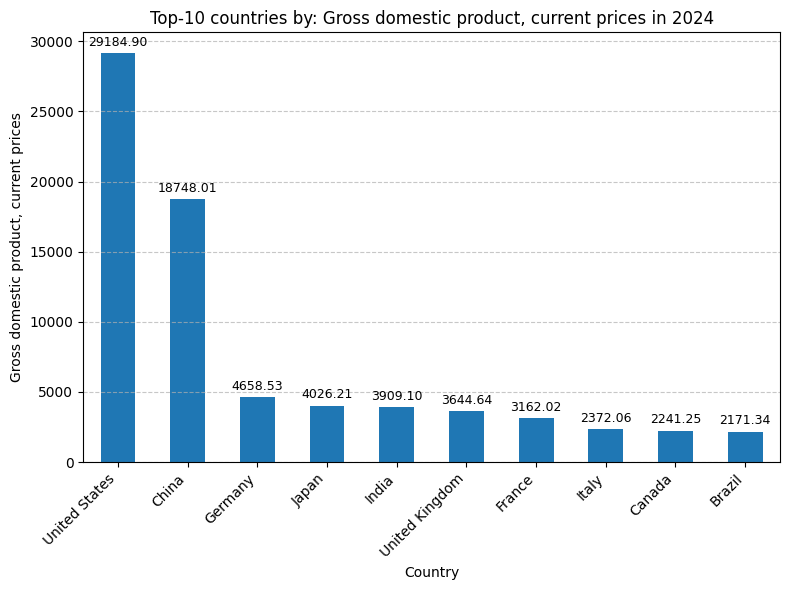

In [56]:
# Выделим ТОП-10 стран по объему ВВП (млрд, доллар США) за 2024г
top_countries('Gross domestic product, current prices')

Вывод: безусловным лидером по объему ВВП является США (29 трлн. долл.), Китай с ВПП 18,7 трлн. долл. на втором месте. На эти две страны приходится 43% мирового ВВП.  Остальные страны существенно отстают от лидеров, так ВВП Германии, которая занимает 3-е место в списке, в 6 раз меньше, чем у США.  

In [57]:
# место России в мировом рейтинге по объему ВВП за 2024г
df.loc[df['Subject Descriptor']== 'Gross domestic product, current prices', ['Country',2024]]\
    .sort_values(by=2024, ascending=False).reset_index(drop=True).head(15)

,Country,2024
0,United States,29184.900
1,China,18748.009
2,Germany,4658.526
3,Japan,4026.211
4,India,3909.097
5,United Kingdom,3644.636
6,France,3162.023
7,Italy,2372.059
8,Canada,2241.253
9,Brazil,2171.337


Вывод:  Россия с ВВП = 2,1 трлн. долл. (1,9% мирового ВВП) за 2024г находится на 11 месте в списке, немного уступив Бразилии в рейтинге. 


In [58]:
# выделим ТОП стран по темпам прироста ВВП 2024/2023
df.loc[df['Subject Descriptor']== 'Gross domestic product, current prices', ['Country', 'Growth_2024_to_2023, %']]\
    .sort_values(by='Growth_2024_to_2023, %', ascending=False)\
    .reset_index(drop=True).head(10)           

,Country,"Growth_2024_to_2023, %"
0,Guyana,45.747385
1,Haiti,33.800949
2,Suriname,29.404935
3,Lebanon,19.794976
4,Sierra Leone,19.634204
5,Sri Lanka,18.204078
6,Niger,18.186686
7,Venezuela,17.026285
8,Türkiye,17.020571
9,Albania,16.551223


In [59]:
# посмотрим темы прироста  ВВП 2024/2023 по тройке лидеров и России 
leaders_and_R = ['United States', 'China', 'Germany', 'Russia']
df[
    (df['Subject Descriptor'] == 'Gross domestic product, current prices') &\
    (df['Country'].isin(leaders_and_R))\
    ][['Country', 'Growth_2024_to_2023, %']] \
    .sort_values(by='Growth_2024_to_2023, %', ascending=False) \
    .reset_index(drop=True)


,Country,"Growth_2024_to_2023, %"
0,United States,5.281878
1,Russia,4.924986
2,Germany,2.905163
3,China,2.614389


In [60]:
# средний темп прироста ВВП 2024/2023 в Европе (без Турции и Албании)
df[
    (df['Subject Descriptor'] == 'Gross domestic product, current prices') &\
    (df['Region']=='Europe')&\
    (df['Country']!= 'Türkiye')&\
    (df['Country']!='Albania')\
    ][['Country', 'Growth_2024_to_2023, %']] \
    .agg({'Growth_2024_to_2023, %':'mean'})\
   


Growth_2024_to_2023, %    5.362884
dtype: float64

Вывод: лидерами по темпам роста ВВП являются развивающиеся страны Африки, Азии и Латинской Америки (исключения Турция и Албания, которые по классификации МВФ относятся к Европе). У стран-лидеров по объему ВВП темпы роста положительные (CША 5,3%, Китай 2,6%, Германия 2,9%), однако существенно отстают от развивающихся стран. В среднем по Европе темп прироста ВВП 5,4% в 2024/2023. Темпы роста экономики в развивающихся странах традиционно выше, чем в развитых ввиду возможности заимствования имеющихся технологий у развитых стран, более высоких темпах роста населения (т.о. рост рабочей силы) и изначально низкой базы ВВП. У России тем роста ВВП 4,9% в год, что является хорошим показателем, т.к. оказался выше заложенного Минфином плана в 3,9%, хотя остается ниже, чем в среднем по Европе.

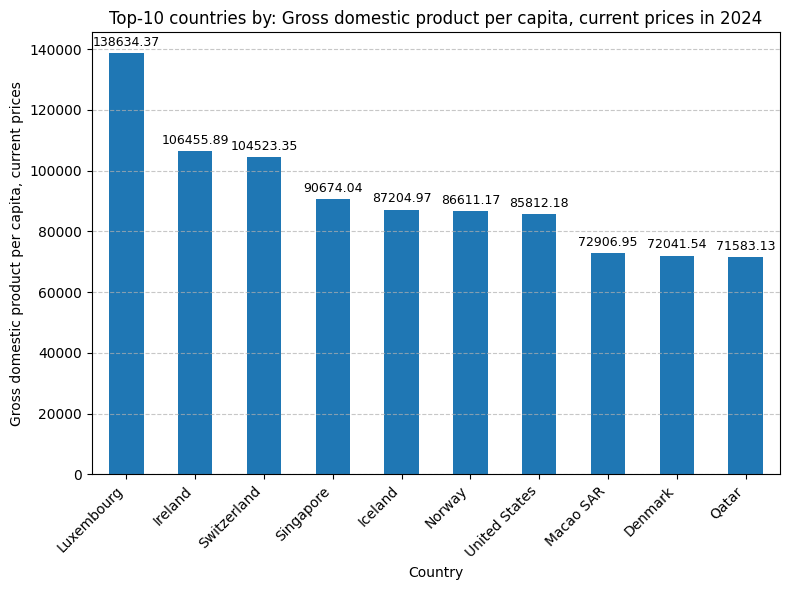

In [61]:
# Выделим ТОП-10 стран по объему ВВП на душу населения (доллар США) за 2024г
top_countries('Gross domestic product per capita, current prices')

Вывод: по объему ВВП на душу населения (показатель, который условно характеризует уровень благосостояния населения страны, чем выше - тем лучше) лидируют Люксембург, Ирландия, Швейцария и Сингапур. Эти страны отличает развитый финансовый сектор, а также благоприятная налоговая среда. Сниженные ставки некоторых корпоративных налогов привлекают инвесторов, т.о.  компании намеренно регистрируются в этих странах для минимизации налогообложения. Также следует отметить, что на показатель может оказывать влияние и значительное число иностранных работников, которые аккумулируют ВВП, но по сути не являются жителями страны, а значит, не учитываются в расчете. 

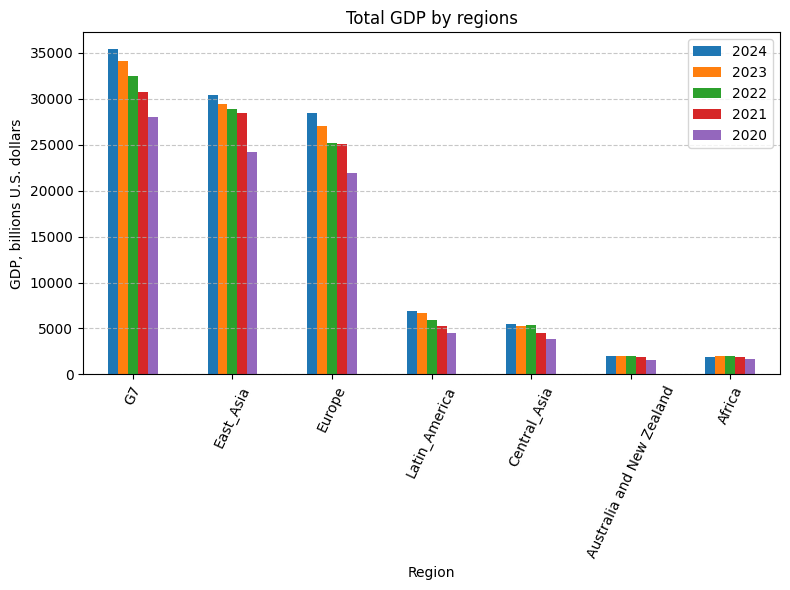

In [62]:
# Проанализируем динамику и объем ВВП по регионам на диаграмме
df.loc[df['Subject Descriptor']=='Gross domestic product, current prices'].\
    groupby('Region').agg({2020:'sum', 2021:'sum', 2022:'sum', 2023:'sum', 2024:'sum'}).\
    reset_index().sort_values(by=2024,ascending=False).\
    plot(kind = 'bar', 
         x='Region', 
         y=[2024,2023,2022, 2021, 2020],
         figsize=(8, 6)
        )
plt.ylabel('GDP, billions U.S. dollars')
plt.xticks(rotation=65) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.title('Total GDP by regions')
plt.tight_layout()  
plt.show()  


Вывод: по совокупному объему ВВП на первом месте  страны "Большой семерки", лидером которых является США. На втором месте Восточная Азия с лидером Китаем, на третьем  - Европа, "локомотивом" экономики которой является Германия.   Во всех регионах кроме Австралии, Новой Зеландии и Африки видим положительную динамику ВВП за последние 5 лет.  Наибольший прирост был в 2021г за счет смягчения ограничительных мер после пандемийного 2020 и мер гос. поддержки во многих странах, направленных на поддержание экономики во время пандемии
.

In [63]:
def leader_in_group(mark):
    '''Функция выводит стран-лидеров по заданному признаку за 2024г. в разбивке по регионам,
    Параметр: mark (str) - признак для фильтрации данных'''
    leaders = df[df['Subject Descriptor'] == mark]\
    .groupby('Region')\
    .apply(lambda x: x.loc[x[2024].idxmax()][['Country', 2024]])\
    .reset_index()\
    .sort_values(by=2024, ascending=False)
    return leaders

Посмотрим страны-лидеры в каждом регионе по ВВП

In [64]:
leader_in_group('Gross domestic product, current prices')  

,Region,Country,2024
5,G7,United States,29184.900
3,East_Asia,China,18748.009
4,Europe,Germany,4658.526
6,Latin_America,Brazil,2171.337
1,Australia and New Zealand,Australia,1796.805
2,Central_Asia,Saudi Arabia,1085.358
0,Africa,South Africa,400.191


Драйверами мировой экономики являются США и Китай, на которые в совокупности приходится 43% общемирового ВВП. Также  региональными лидерами являются: Германия - в Европе, Бразилия - в Латинской Америке, Австралия - в регионе Австралия и Новая Зеландия , Саудовская Аравия  - в Средней Азии и ЮАР - в Африке.  В совокупности на эти 7 стран приходится почти 60% мирового ВВП.  

### Анализ численности населения и безработицы <div id="cell3.3"></div> 

Посмотрим динамику совокупной численности населения в мире

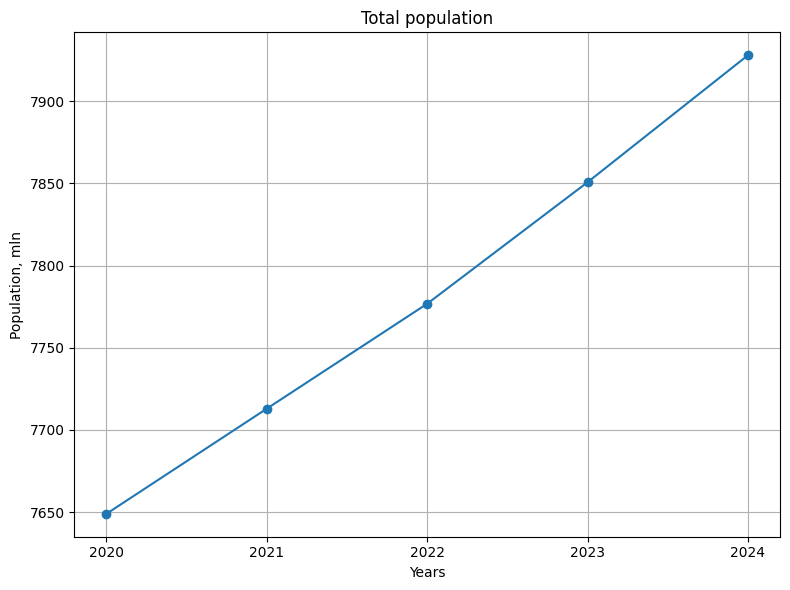

In [65]:
# диаграмма динамики численности населения
df.loc[df['Subject Descriptor']== 'Population']\
    .agg({2020:'sum', 2021:'sum', 2022:'sum', 2023:'sum', 2024:'sum'})\
    .plot(kind='line', figsize=(8, 6), marker='o',legend =False)
plt.title('Total population')
plt.xlabel('Years')
plt.ylabel('Population, mln')
plt.xticks(ticks = [2020,2021,2022,2023,2024])
plt.grid(True)  
plt.tight_layout()  
plt.show()             
    
    
                                                  

Вывод: население мира стабильно растет, приблизившись в 2024г к 8 млрд чел

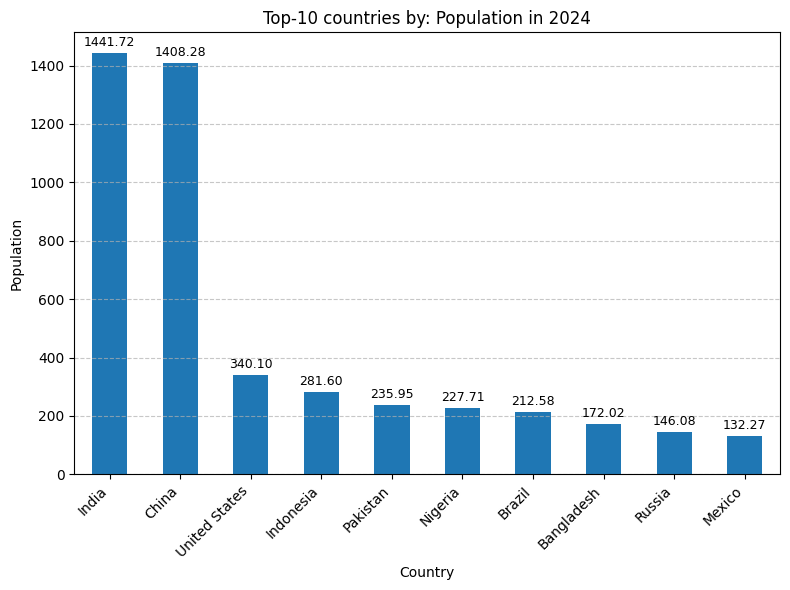

In [66]:
# выделим ТОП стран по численности населения
top_countries('Population')

Вывод: лидерами по численности населения традиционно остаются азиатские страны. В 2024г лидером является Индия, число жителей которой превысило 1,44 млрд. чел., опередив Китай с численностью населения 1,41 млрд. чел., который занимает 2-е место. Совокупно на эти две страны приходится почти 35% всех жителей планеты.  Остальные страны существенно отстают по численности, так у США (занимает 3-е место) население составляет 340 млн. чел.(в 4 раза меньше, чем у Китая). В ТОП-10 вошла Россия, которая занимает 9-е место с численностью 146 млн. чел.

Дополнительно посмотрим на темп прироста населения за 2024/2023

In [67]:
# выделим страны-лидеры по темпу прироста
df.loc[df['Subject Descriptor']== 'Population', ['Country', 'Growth_2024_to_2023, %']]\
    .sort_values(by='Growth_2024_to_2023, %', ascending=False)\
    .reset_index(drop=True).head(10)                                                     

,Country,"Growth_2024_to_2023, %"
0,Saudi Arabia,4.738451
1,Niger,3.746398
2,Angola,3.500164
3,Central African Republic,3.474379
4,Vanuatu,3.293413
5,Democratic Republic of the Congo,3.250690
6,Oman,3.193961
7,Mali,3.163905
8,Uganda,3.098050
9,Yemen,3.026072


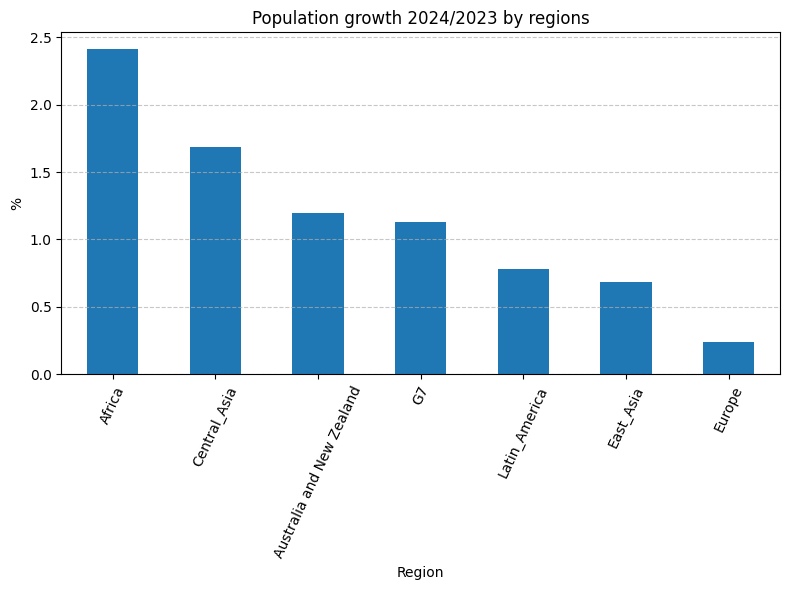

In [68]:
# посмотрим прирост населения отдельно по регионам
df.loc[df['Subject Descriptor']=='Population', ['Region','Growth_2024_to_2023, %']].\
    groupby('Region').agg({'Growth_2024_to_2023, %':'mean'}).\
    reset_index().sort_values(by='Growth_2024_to_2023, %',ascending=False).\
    plot(kind = 'bar', x='Region', figsize=(8, 6), legend=False)
plt.ylabel('%')
plt.xticks(rotation=65) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.title('Population growth 2024/2023 by regions')
plt.tight_layout()  
plt.show()  

Вывод: Мировой рост населения обеспечивается преимущественно за счет африканских и центрально-азиатских стран.   

In [69]:
# выделим страны с максимальной убылью населения (отрицательный рост) 
df.loc[df['Subject Descriptor']== 'Population', ['Country', 'Growth_2024_to_2023, %']]\
    .sort_values(by='Growth_2024_to_2023, %')\
    .reset_index(drop=True).head(20)  



,Country,"Growth_2024_to_2023, %"
0,Marshall Islands,-5.000000
1,Moldova,-2.768860
2,Ukraine,-2.007289
3,Georgia,-1.097430
4,Kosovo,-1.059850
5,Albania,-1.018182
6,Tonga,-1.000000
7,Bulgaria,-0.993018
8,Serbia,-0.709648
9,Venezuela,-0.669409


In [70]:
# в России 
print('Убыль населения в России:', df.loc[(df['Subject Descriptor']== 'Population')&(df['Country']=='Russia')]['Growth_2024_to_2023, %'])
          

Убыль населения в России: 1149   -0.149693
Name: Growth_2024_to_2023, %, dtype: float64


На первом месте по убыванию населения в 2024г являются Маршалловы о-ва (-5% в год), но обусловлено это миграцией населения. Больше всего европейских стран в этом  рейтинге, также Япония и Венесуэла, где население за год сократилось на 0,47% и 0,67% соответсвенно. В России население сократилось на 0,15% за 2024г, несмотря на государственную программу демографической поддержки. 

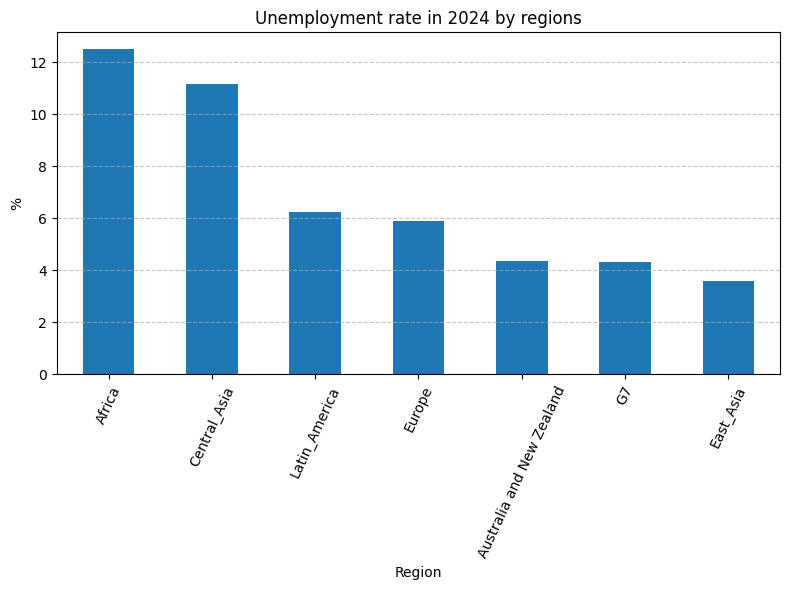

In [71]:
# посмотрим прирост населения отдельно по регионам
df.loc[df['Subject Descriptor']=='Unemployment rate', ['Region',2024]].\
    groupby('Region').agg({2024:'mean'}).\
    reset_index().sort_values(by=2024,ascending=False).\
    plot(kind = 'bar', x='Region', figsize=(8, 6), legend=False)
plt.ylabel('%')
plt.xticks(rotation=65) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.title('Unemployment rate in 2024 by regions')
plt.tight_layout()  
plt.show()  

Вывод: уровень безработицы 4-6% считается допустимым (фрикционная безработица). В большинстве регионов в среднем безработица на этом уровне, кроме стран Африки и Центральной Азии (где уровень безработицы выше 10%). При этом стоит отметить, что  внутри региона уровень может сильно варьироваться между странами.


Отдельно проанализируем безработицу и динамику численности населения в России

In [72]:
# сделаем срез показателей по России
dfr = df[df['Country']=='Russia'].drop(columns='Country')
# отдельно выделим безработицу и численность населения
unemployment = dfr.loc[dfr['Subject Descriptor']=='Unemployment rate',[2020,2021,2022,2023,2024]].T
population = dfr.loc[dfr['Subject Descriptor']=='Population',[2020,2021,2022,2023,2024]].T

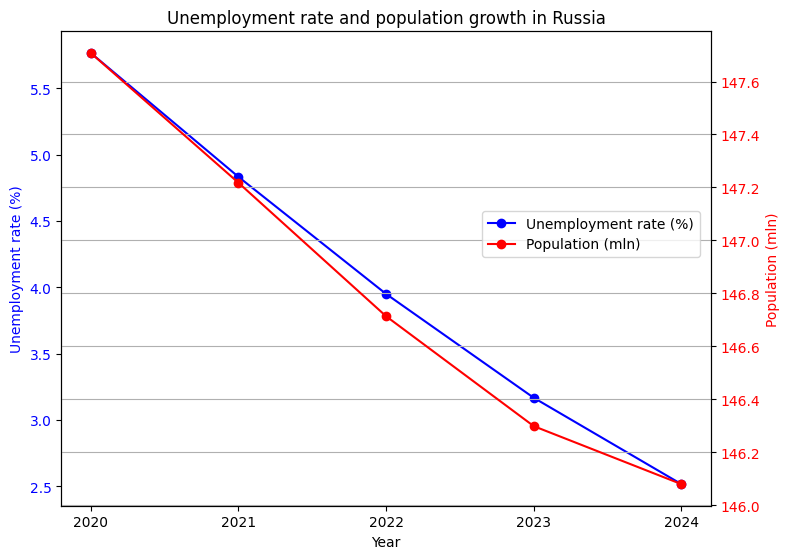

In [73]:
# Создаем граифк
fig, ax1 = plt.subplots(figsize=(8, 6))

# Строим первую ось (безработица)
ax1.plot(unemployment, marker='o', color='b', label='Unemployment rate (%)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment rate (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаем вторую ось (численность населения)
ax2 = ax1.twinx()
ax2.plot(population, marker='o', color='r', label='Population (mln)')
ax2.set_ylabel('Population (mln)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Unemployment rate and population growth in Russia')
fig.legend(loc='lower left', bbox_to_anchor=(0.6, 0.5))
plt.grid(True)
plt.xticks([2020,2021,2022,2023,2024])
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

Вывод: население России сокращается каждый год, за период с 2020 по 2024, сократилось более чем на 1,5 млн. чел  и составляет  146 млн. в 2024. Несмотря на меры гос.поддержки демографии. Безработица также сокращалась последние 5 лет,  достигнув 2,5% в 2024 г., что является ниже стандартного уровня фрикционной безработицы (4-6%) и свидетельствует о дефиците кадров.  

### Анализ инфляции <div id="cell3.4"></div> 

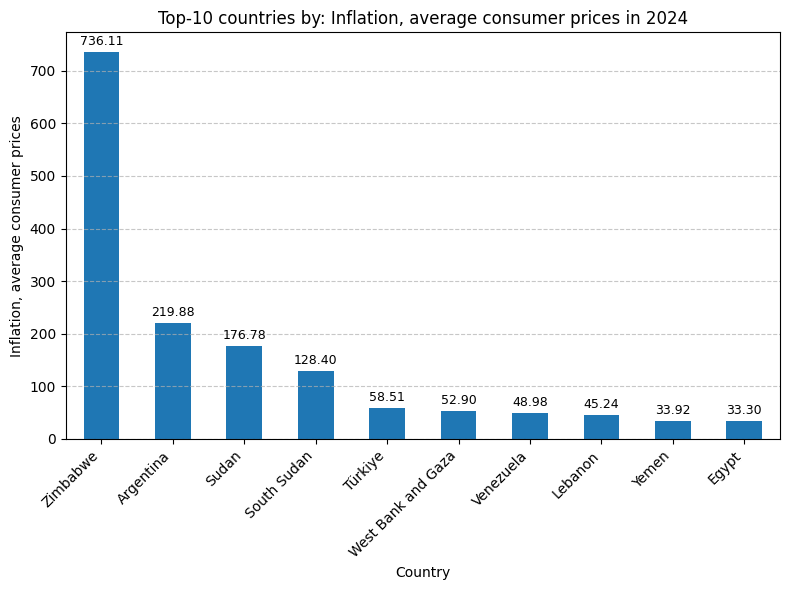

In [74]:
# выделим ТОП стран по инфляции
top_countries('Inflation, average consumer prices')

Вывод: в десятке лидеров по уровню инфляции в основном африканские и латиноамериканские страны (исключение Турция). 
Зимбабве лидирует по уровню инфляции в мире (736% в год), гиперинфляция наблюдается в стране еще с конца 1990-х годов, вызвана политическим и экономическим кризисом в стране. Несмотря на попытки властей ограничить инфляцию (в т.ч. отказ от национальной валюты и переход на доллар США), ситуация остается проблемной до сих пор.  На втором месте  Аргентина - 219% в год (обусловлено политическими факторами, в т.ч. действиями нового Президента страны, девальвацией нац. валюты). 

In [75]:
# выделим страны с минимальной инфляцией 
df.loc[df['Subject Descriptor']== 'Inflation, average consumer prices', ['Country', 2024]]\
    .sort_values(by=2024)\
    .reset_index(drop=True).head(10)   
       

,Country,2024
0,St. Lucia,-0.448
1,Costa Rica,-0.412
2,Brunei Darussalam,-0.389
3,Jordan,0.161
4,Seychelles,0.184
5,China,0.212
6,Armenia,0.272
7,Thailand,0.398
8,The Bahamas,0.413
9,Trinidad and Tobago,0.477


Вывод: в мире есть несколько стран с отрицательной инфляцией (дефляцией, т.е. снижением цен), однако таких стран лишь единицы, преимущественно у стран наблюдается рост цен.  Дефляция является негативным фактором для экономики страны, т.к. есть риск запуска дефляционной спирали и рецессии экономики. 


Проанализируем инфляцию в России

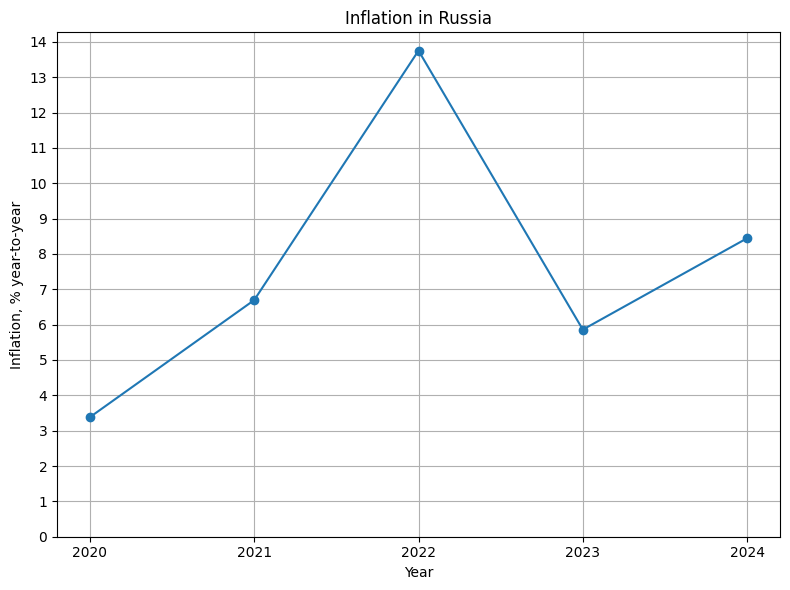

In [76]:
# построим линейный график инфляции в России за 2020-2024 гг.
df.loc[
    (df['Subject Descriptor']== 'Inflation, average consumer prices')&
    (df['Country']== 'Russia'), 
    ['Country', 2020,2021,2022,2023,2024]
    ].set_index('Country').T\
    .plot(kind='line', figsize=(8, 6), marker='o',legend =False)

plt.title('Inflation in Russia')
plt.xlabel('Year')
plt.ylabel('Inflation, % year-to-year')
plt.xticks(ticks = [2020,2021,2022,2023,2024])
plt.yticks(np.arange(0,15,1))
plt.grid(True)  
plt.tight_layout()  
plt.show()         


Вывод: резкий рост инфляции наблюдался в России в 2022г (инфляция составила 14%), что обусловлено политическими причинами, санкционным давлением, ограничением импорта. В последующие годы инфляцию снизилась (менее 9% в 2024) благодаря сдерживающей денежно-кредитной политике ЦБ, однако по-прежнему остается существенно выше целевого уровня ЦБ в 4%. 

In [77]:
# построим  инфляцию в Китае и США 2020-2024 гг.
chru = df.loc[
    (df['Subject Descriptor']== 'Inflation, average consumer prices')&
    (df['Country'].isin(['Russia', 'United States', 'China'])), 
    ['Country', 2020,2021,2022,2023,2024]
    ]
chru

,Country,2020,2021,2022,2023,2024
291,China,2.490,0.918,1.976,0.228,0.212
1147,Russia,3.382,6.694,13.750,5.859,8.444
1491,United States,1.253,4.679,7.993,4.128,2.952


### Анализ государственного долга <div id="cell3.5"></div> 

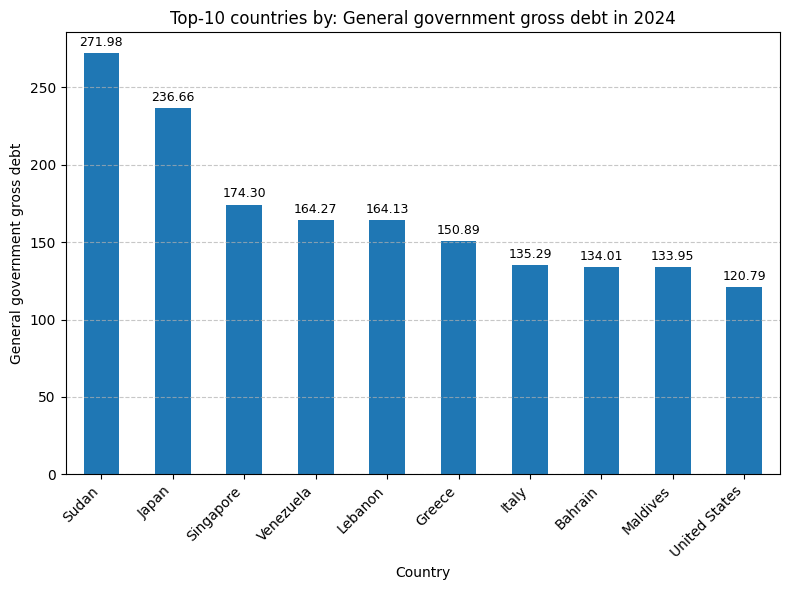

In [78]:
# выделим ТОП стран по объемугосдолга (в % к ВПП)
top_countries('General government gross debt')

Вывод: в десятке лидеров по объему гос. долга присутствуют Япония, США и страны ЕС (Греция и Италия). Гос.долг этих стран превышает 100% ВВП страны.  По оценкам Всемирного банка считается, что долг становится проблемой для экономики, когда  достигает 77% ВВП. Тем не менее гос. долг данных стран номинирован в нац. валютах, которые  входят в корзину мировых резервных валют, что является митигирующим фактором. Также в лидерах Судан, Венесуэла, Ливан. Высокий долг данных стран вызван политической и экономической нестабильностью внутри страны, необходимостью привлекать внешние заимствования для поддержания экономики.  

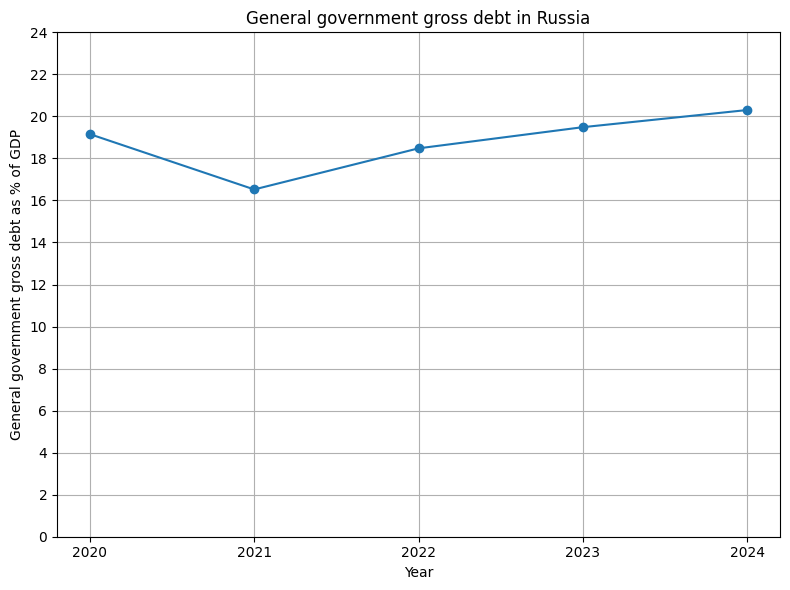

In [79]:
# построим линейный график динамики госдолга в России за 2020-2024 гг.
df.loc[
    (df['Subject Descriptor']== 'General government gross debt')&
    (df['Country']== 'Russia'), 
    ['Country', 2020,2021,2022,2023,2024]
    ].set_index('Country').T\
    .plot(kind='line', figsize=(8, 6), marker='o',legend =False)

plt.title('General government gross debt in Russia')
plt.xlabel('Year')
plt.ylabel('General government gross debt as % of GDP')
plt.xticks(ticks = [2020,2021,2022,2023,2024])
plt.yticks(np.arange(0,25,2))
plt.grid(True)  
plt.tight_layout()  
plt.show()  

Вывод: в России объем гос. долга низкий, существенно ниже "безопасного" уровня в 77%.

## Итоговый вывод <div id="cell4"></div> 

Выгружены данные МВФ за 2020-2025г, проведена предварительная обработка данных.
По результатам анализа можно сделать следующие выводы: 

ВВП: 

Драйверами мировой экономики являются США и Китай, на которые в совокупности приходится 43% общемирового ВВП. Также региональными лидерами являются: Германия - в Европе, Бразилия - в Латинской Америке, Австралия - в регионе Австралия и Новая Зеландия , Саудовская Аравия - в Средней Азии и ЮАР - в Африке. В совокупности на эти 7 стран приходится почти 60% мирового ВВП.
Россия с ВВП = 2,1 трлн. долл. (1,9% мирового ВВП) за 2024г находится на 11 месте в списке, немного уступив Бразилии.
По темпам роста ВВП лидерами являются развивающиеся страны Африки, Азии и Латинской Америки. Темпы роста экономики в развивающихся странах традиционно выше, чем в развитых ввиду возможности заимствования имеющихся технологий у развитых стран, более высоких темпах роста населения (т.о. рост рабочей силы) и изначально низкой базы ВВП. 
У России тем роста ВВП 4,9% за 2024 год, что является хорошим показателем, т.к. оказался выше заложенного Минфином плана в 3,9%, хотя остается ниже, чем в среднем по Европе (5,4% в 2024/2023).
По объему ВВП на душу населения (показатель, который условно характеризует уровень благосостояния населения страны) лидируют Люксембург, Ирландия, Швейцария и Сингапур. Эти страны отличает развитый финансовый сектор, а также благоприятная налоговая среда, что привлекает инвесторов. Также следует отметить, что на показатель может оказывать влияние и значительное число иностранных работников, которые аккумулируют ВВП, но по сути не являются жителями страны, а значит, не учитываются в расчете.

Население и безработица: 

Население мира стабильно растет, приблизившись в 2024г. к 8 млрд. чел. Рост  обеспечивается преимущественно за счет африканских и центрально-азиатских стран, страны лидеры по темпу роста в 2024г.: Саудовская Аравия (+4,7%) , Нигер (+3,7%), Ангола (+3,5%). При этом в Европе средний темп роста населения был менее 0,5% в 2024/2023 гг. 
Уровень безработицы 4-6% считается допустимым (фрикционная безработица). В большинстве регионов в среднем безработица на этом уровне, кроме стран Африки и Центральной Азии (где уровень безработицы выше 10%). При этом стоит отметить, что  внутри региона уровень может сильно варьироваться между странами.
Население России сокращается каждый год, за период с 2020 по 2024, сократилось более чем на 1,5 млн. чел  и составляет  146 млн. в 2024, несмотря на государственную программу демографической поддержки. Безработица в России также сокращалась последние 5 лет,  достигнув 2,5% в 2024 г., что является ниже стандартного уровня фрикционной безработицы (4-6%) и свидетельствует о дефиците кадров.


Инфляция:

В десятке лидеров по уровню инфляции в основном африканские и латиноамериканские страны. Зимбабве лидирует по уровню инфляции в мире (736% в год), гиперинфляция наблюдается в стране еще с конца 1990-х годов, вызвана политическим и экономическим кризисом в стране. На втором месте Аргентина - 219% в год (обусловлено политическими факторами, в т.ч. действиями нового Президента страны, девальвацией нац. валюты). Среди Европейских стран по уровню инфляции выделяется Турция (58% в год).
В России резкий рост инфляции наблюдался в 2022г (14%), что обусловлено политическими причинами, санкционным давлением, ограничением импорта. В последующие годы инфляцию снизилась (менее 9% в 2024) благодаря сдерживающей денежно-кредитной политике ЦБ, однако по-прежнему остается существенно выше целевого уровня ЦБ в 4%.

Государственный долг:

В десятке лидеров по объему гос. долга присутствуют Япония, США и страны ЕС (Греция и Италия). Гос.долг этих стран превышает 100% ВВП страны. По оценкам Всемирного Банка считается, что долг становится проблемой для экономики, когда достигает 77% ВВП. Тем не менее гос. долг данных стран номинирован в нац. валютах, которые входят в корзину мировых резервных валют, что является митигирующим фактором. Также в лидерах по объему гос. долга Судан, Венесуэла, Ливан. Высокий долг данных стран вызван политической и экономической нестабильностью внутри страны, необходимостью привлекать внешние заимствования для поддержания экономики.
В России объем гос. долга низкий (менее 20% ВВП), существенно ниже "безопасного" уровня в 77%.
